In [1]:
import pandas as pd

In [6]:
data = pd.read_csv("c2_financial_data.csv", index_col="Date")

data.index = pd.to_datetime(data.index, format="%d.%m.%y")

In [9]:
print(data.shape)

(9137, 6)


In [10]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1984-06-01,8.04,8.13,7.83,8.00,1.84,741000.0
1984-06-04,8.33,8.67,8.17,8.46,1.95,584700.0
1984-06-05,8.46,8.54,8.25,8.38,1.93,5370300.0
1984-06-06,8.38,8.54,8.38,8.54,1.97,365700.0
1984-06-07,8.54,8.58,8.46,8.54,1.97,904800.0


In [12]:
prices = data["Close"]

In [13]:
prices.index[:4]

DatetimeIndex(['1984-06-01', '1984-06-04', '1984-06-05', '1984-06-06'], dtype='datetime64[ns]', name='Date', freq=None)

In [14]:
prices["2012-01-01":"2012-01-10"]

Date
2012-01-03    34.98
2012-01-04    34.95
2012-01-05    35.68
2012-01-06    35.36
2012-01-09    35.30
2012-01-10    36.05
Name: Close, dtype: float64

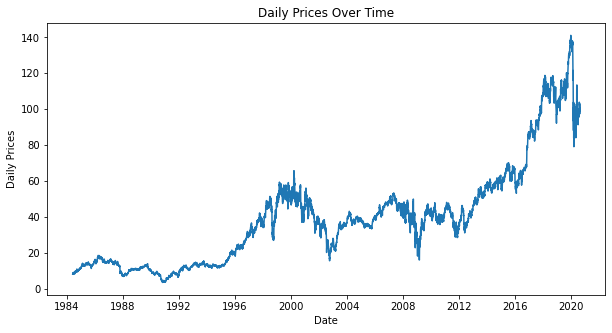

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.subplots(figsize=(10, 5))

plt.plot(prices)
plt.title("Daily Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Daily Prices")
plt.show()

In [18]:
Pt = prices["2019-12-15":"2019-12-30"]
Pt

Date
2019-12-16    137.34
2019-12-17    138.18
2019-12-18    138.04
2019-12-19    137.35
2019-12-20    137.24
2019-12-23    137.20
2019-12-24    137.58
2019-12-26    139.04
2019-12-27    139.14
2019-12-30    138.63
Name: Close, dtype: float64

In [21]:
# shift in pandas shifts values within a Series .. good for forecasting

Pt.shift(periods=1)

# shift forward is called lead, back a lag

Date
2019-12-16       NaN
2019-12-17    137.34
2019-12-18    138.18
2019-12-19    138.04
2019-12-20    137.35
2019-12-23    137.24
2019-12-24    137.20
2019-12-26    137.58
2019-12-27    139.04
2019-12-30    139.14
Name: Close, dtype: float64

In [22]:
Pt.shift(periods=-1)

Date
2019-12-16    138.18
2019-12-17    138.04
2019-12-18    137.35
2019-12-19    137.24
2019-12-20    137.20
2019-12-23    137.58
2019-12-24    139.04
2019-12-26    139.14
2019-12-27    138.63
2019-12-30       NaN
Name: Close, dtype: float64

In [23]:
p = pd.concat([Pt.shift(-1), Pt, Pt.shift(1), Pt.shift(2)], axis=1)
p.columns = ["Pt+1", "Pt", "Pt-1", "Pt-2"]
print(p)

              Pt+1      Pt    Pt-1    Pt-2
Date                                      
2019-12-16  138.18  137.34     NaN     NaN
2019-12-17  138.04  138.18  137.34     NaN
2019-12-18  137.35  138.04  138.18  137.34
2019-12-19  137.24  137.35  138.04  138.18
2019-12-20  137.20  137.24  137.35  138.04
2019-12-23  137.58  137.20  137.24  137.35
2019-12-24  139.04  137.58  137.20  137.24
2019-12-26  139.14  139.04  137.58  137.20
2019-12-27  138.63  139.14  139.04  137.58
2019-12-30     NaN  138.63  139.14  139.04


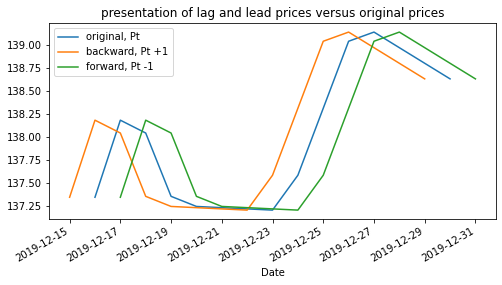

In [31]:
Pt.plot(figsize=(8, 3), label="original, Pt")
Pt.shift(-1, freq="D").plot(figsize=(8, 4), label="backward, Pt +1")
Pt.shift(1, freq="D").plot(figsize=(8, 4), label="forward, Pt -1")
plt.title("presentation of lag and lead prices versus original prices")
plt.legend()
plt.show()

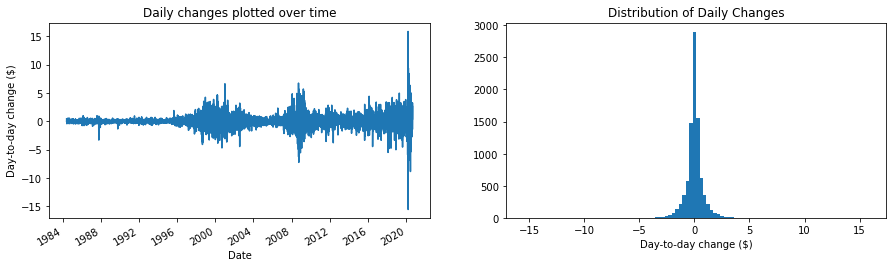

In [32]:
# Compute first difference
diff = prices - prices.shift(1)

# the subplot on the left
plt.subplot(121)
diff.plot(figsize=(15, 4))
plt.title("Daily changes plotted over time")
plt.ylabel("Day-to-day change ($)")

# the subplot on the right
plt.subplot(122)
diff.hist(figsize=(15, 4), bins=100, grid=False)
plt.title("Distribution of Daily Changes")
plt.xlabel("Day-to-day change ($)")

plt.show()

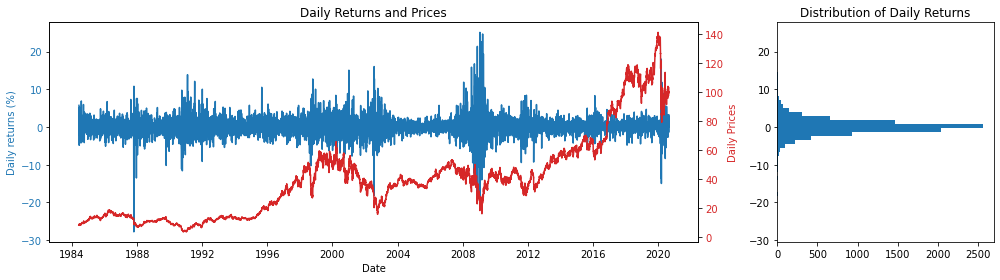

In [33]:
# Compute daily returns: divide the first difference by the price in the previous day
daily_percentage_change = 100 * diff / prices.shift(1)

# drop the first value which is NaN
daily_percentage_change.dropna(inplace=True)

# Plot the results and original prices together
# initialize two subplots in 1 row and two columns. Also specify the width of each plot
fig, ax1 = plt.subplots(1, 2, figsize=(14, 4), gridspec_kw={"width_ratios": [3, 1]})

# subplot for daily_percentage_change
color = "tab:blue"
ax1[0].set_xlabel("Date")
ax1[0].set_ylabel("Daily returns (%)", color=color)
ax1[0].plot(daily_percentage_change, color=color)
ax1[0].tick_params(axis="y", labelcolor=color)

# Create twin axes, so they can share the same xaxis, i.e. Dates
ax2 = ax1[0].twinx()

# daily prices on the same subplot
color = "tab:red"
ax2.set_ylabel("Daily Prices", color=color)
ax2.plot(prices, color=color)
ax2.tick_params(axis="y", labelcolor=color)

plt.title("Daily Returns and Prices")

# create the second subplot which is the histogram of daily_percentage_change
ax1[1].hist(daily_percentage_change, bins=50, orientation="horizontal")
ax1[1].set_title("Distribution of Daily Returns")

fig.tight_layout()
plt.show()

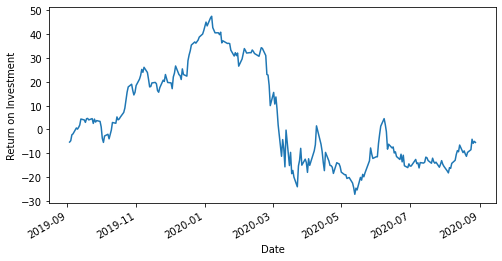

In [34]:
# Net profit over a year (in working days)
net_profit = prices - prices.shift(260)

# Return on Investment
roi = 100 * net_profit / prices.shift(260)

# Plot result
roi["2019-09-01":"2020-08-28"].plot(figsize=(8, 4))
plt.ylabel("Return on Investment")
plt.show()

In [35]:
# The Pandas diff(1) function performs the same job as the prices - prices.shift(1)

Pt.diff(1)

Date
2019-12-16     NaN
2019-12-17    0.84
2019-12-18   -0.14
2019-12-19   -0.69
2019-12-20   -0.11
2019-12-23   -0.04
2019-12-24    0.38
2019-12-26    1.46
2019-12-27    0.10
2019-12-30   -0.51
Name: Close, dtype: float64

In [36]:
# pct_change(1) we can calculate the price changes as prices.pct_change(1). This will produce the same results as (prices - prices.shift(1))/prices.shift(1)

prices.pct_change(1)

Date
1984-06-01         NaN
1984-06-04    0.057500
1984-06-05   -0.009456
1984-06-06    0.019093
1984-06-07    0.000000
                ...   
2020-08-24    0.028155
2020-08-25    0.004397
2020-08-26   -0.014030
2020-08-27    0.032899
2020-08-28    0.004104
Name: Close, Length: 9137, dtype: float64

In [37]:
# use freq B no shift to avoid dropping values

Pt.shift(1, freq="B")

Date
2019-12-17    137.34
2019-12-18    138.18
2019-12-19    138.04
2019-12-20    137.35
2019-12-23    137.24
2019-12-24    137.20
2019-12-25    137.58
2019-12-27    139.04
2019-12-30    139.14
2019-12-31    138.63
Name: Close, dtype: float64

In [38]:
data = [1, 2, "t", 4]
indices = [4, "Tokyo", "blue", "dog"]
s = pd.Series(data, indices)
s

4        1
Tokyo    2
blue     t
dog      4
dtype: object

In [39]:
s.shift(1)

4        NaN
Tokyo      1
blue       2
dog        t
dtype: object

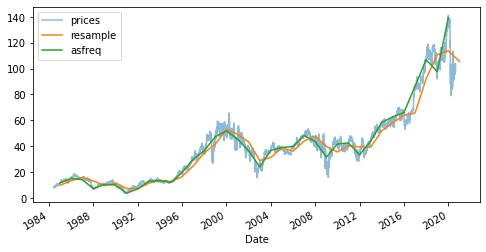

In [42]:
# create the figure
plt.figure(figsize=(8,4))

# plot prices
prices.plot(alpha=0.5)

# downsampling - end of business year "BA"
# variant 1: using resample()
prices.resample("BA").mean().plot()

# variant 2: using asfreq()
prices.asfreq("BA").plot()

plt.legend(["prices", "resample", "asfreq"], loc="upper left")
plt.show()

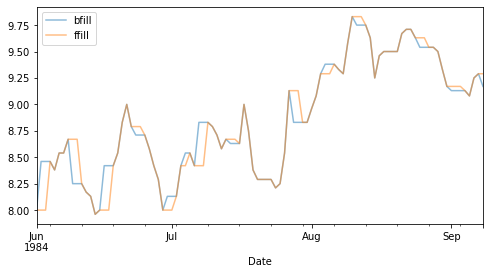

In [43]:
# Create the figure
plt.figure(figsize=(8, 4))

# Upsampling
# "backward fill" - fill missing with the closest value on the right
prices.asfreq("D", method="bfill")[0:100].plot(alpha=0.5)

# "forward fill" - fill missing with the closest value on the left
prices.asfreq("D", method="ffill")[0:100].plot(alpha=0.5)

plt.legend(["bfill", "ffill"], loc="upper left")
plt.show()

In [44]:
from scipy.stats import skew, kurtosis

# calculate skewness and kurtosis for the resampled data
s, k = [], []
for freq in ["B", "W", "M", "Q"]:
    s.append(skew(prices.pct_change().resample(freq).mean().dropna()))
    k.append(kurtosis(prices.pct_change().resample(freq).mean().dropna()))

Skewness and kurtosis inform us about the shape of a distribution. Skewness measures the degree of asymmetry around the center. For example, normal distribution is symmetric and has skewness 0. A skewness of smaller or larger than 0 indicates some degree of asymmetry. Kurtosis measures how the tails are stretched on both sides of the distribution. For instance, normal distribution has kurtosis 3, and kurtosis of larger than 3 indicates that the tails of the distribution are further stretched (are fat) compared to the normal distribution.

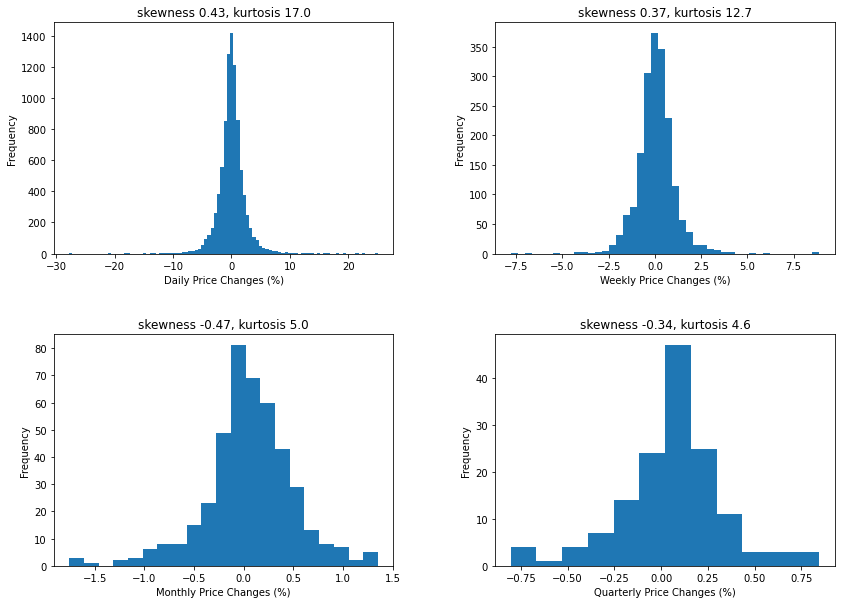

In [45]:
fig, axes = plt.subplots(
    nrows=2, ncols=2, figsize=(14, 10), gridspec_kw={"hspace": 0.35, "wspace": 0.3}
)

for (ax, resamp, freq, n_bin, i) in zip(
    axes.flatten(),
    ["B", "W", "M", "Q"],  # resampling frequency
    ["Daily", "Weekly", "Monthly", "Quarterly"],  # x-axis labels
    [96, 44, 21, 12],  # number of bins
    [0, 1, 2, 3],  # skewness and kurtosis as titles
):

    ax.hist(100 * prices.pct_change().resample(resamp).mean(), n_bin)

    ax.set(
        xlabel=freq + " Price Changes (%)",
        ylabel="Frequency",
        title="skewness {:.2f}".format(s[i]) + ", kurtosis {:.1f}".format(3 + k[i]),
    )

plt.show()

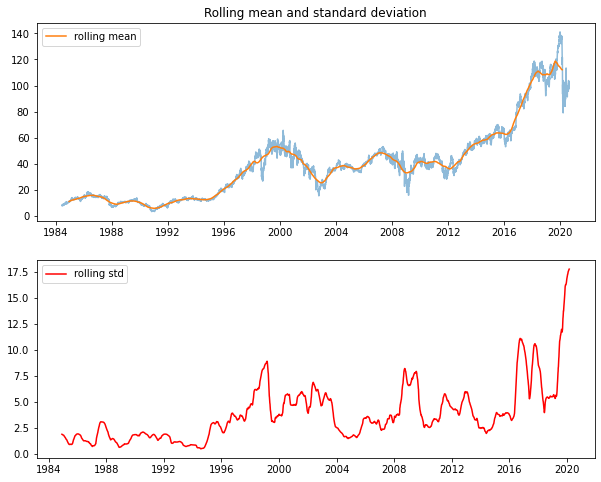

In [52]:
# compute roling mean and s.d
rolling_mean_1year = prices.rolling(260, center=True).mean()
rolling_std_1year = prices.rolling(260, center=True).std()

# setup plot
fig, axes = plt.subplots(2, figsize=(10, 8))

axes[0].set_title("Rolling mean and standard deviation")
axes[0].plot(prices, alpha=0.5)
axes[0].plot(rolling_mean_1year, label="rolling mean")
axes[0].legend()
axes[1].plot(rolling_std_1year, c="red", label="rolling std")
axes[1].legend()
plt.show()

In [61]:
# center = false for preceding values, true for surrounding

def detect_outliers_rolling(timeseries, days=10, n_std=2, center=False):
    
    rolling_mean = timeseries.rolling(window=days, center=center).mean()
    rolling_std = timeseries.rolling(window=days, center=center).std()
    lower_bound = rolling_mean - (n_std * rolling_std)
    upper_bound = rolling_mean + (n_std * rolling_std)
    
    # identify outliers
    
    mask = (timeseries < lower_bound) | (timeseries > upper_bound)
    outliers = timeseries[mask]
    
    # plot bounds and outliers
    
    plt.figure(figsize=(12,6))
    plt.plot(timeseries, "lightblue", label="Time series")
    plt.plot(rolling_mean, "orange", label="Rolling mean")
    plt.plot(upper_bound, "r--", label="Bounds", alpha=0.5)
    plt.plot(lower_bound, "r--", label="", alpha=0.5)
    plt.plot(outliers, "ro", markersize=5, label="Outlier Candidate")
    plt.legend(loc="best")
    plt.grid(True)
    plt.title(
        "{} outliers detected using a moving window of size = {}".format(
            len(outliers), days
        )
    )
    plt.show()

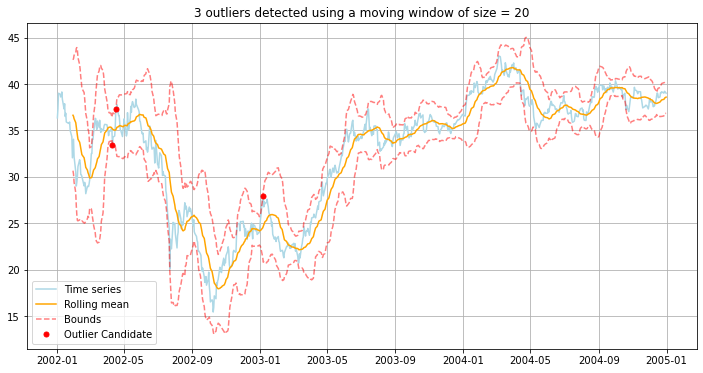

In [62]:
detect_outliers_rolling(prices["2002":"2004"], days=20, n_std=3)